In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.family':'serif'})

In [2]:
# importa IPCA
ipca = pd.read_excel('./dados/ipca_serie_historica.xlsx', dtype={"ANO": "string",
                                                                 "MES": "string"})

ipca["ANO"] = ipca["ANO"].ffill()

meses = {"JAN": "01", "FEV": "02", "MAR": "03", "ABR": "04", "MAI": "05", "JUN": "06",
         "JUL": "07", "AGO": "08", "SET": "09", "OUT": "10", "NOV": "11", "DEZ": "12"}

ipca["MES"] = ipca["MES"].map(meses)
ipca["MES"] = pd.to_datetime(ipca["ANO"] + ipca["MES"] + "01", format='%Y-%m-%d')
ipca = ipca.drop(["ANO"], axis=1)

# importa CDI
cdi = pd.read_excel('./dados/cdi_serie_historica.xlsx')


In [3]:
ipca.head()

,MES,IPCA_MES,IPCA_3M,IPCA_6M,IPCA_ANO,IPCA_12M
0,1994-01-01,41.31,162.13,533.33,41.31,2693.84
1,1994-02-01,40.27,171.24,568.17,98.22,3035.71
2,1994-03-01,42.75,182.96,602.93,182.96,3417.39
3,1994-04-01,42.68,185.71,648.92,303.73,3828.49
4,1994-05-01,44.03,193.36,695.71,481.49,4331.19


In [4]:
ipca_ntnb = ipca.loc[ipca["MES"] > "2000-06-01"]
ipca_medio_mensal = ipca_ntnb["IPCA_MES"].mean()
print(f"IPCA médio mensal: {ipca_medio_mensal}")
ipca_ntnb.head()

IPCA médio mensal: 0.5187591240875912


,MES,IPCA_MES,IPCA_3M,IPCA_6M,IPCA_ANO,IPCA_12M
78,2000-07-01,1.61,1.85,2.64,3.28,7.06
79,2000-08-01,1.31,3.18,3.85,4.63,7.86
80,2000-09-01,0.23,3.18,3.86,4.87,7.77
81,2000-10-01,0.14,1.68,3.57,5.02,6.65
82,2000-11-01,0.32,0.69,3.89,5.35,5.99


In [5]:
cdi_ntnb = cdi.loc[cdi["MES"] > "2000-06-01"]
cdi_medio_mensal = cdi_ntnb["CDI_MES"].mean()
print(f"CDI médio mensal: {cdi_medio_mensal}")
cdi_ntnb.head()

CDI médio mensal: 0.9420802919708029


,MES,CDI_MES
78,2000-07-01,1.30
79,2000-08-01,1.40
80,2000-09-01,1.22
81,2000-10-01,1.28
82,2000-11-01,1.22


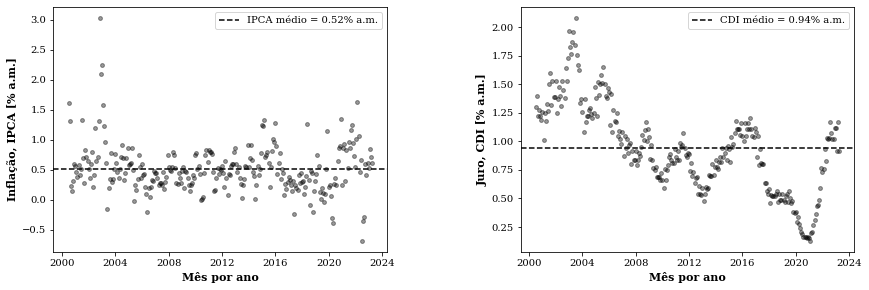

In [6]:
# plot 1
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14.35, 4.5))

# set the spacing between subplots
plt.subplots_adjust(wspace=0.4)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

# plot IPCA
ax[0].scatter(ipca_ntnb["MES"], ipca_ntnb["IPCA_MES"], s=15, alpha=0.4, linewidths=1, color='black')
ax[0].axhline(y = ipca_medio_mensal, color = 'k', linestyle = '--', label="IPCA médio = 0.52% a.m.")

# IPCA eixos
ax[0].set_ylabel('Inflação, IPCA [% a.m.]', fontweight='bold', fontdict=font)
ax[0].set_xlabel('Mês por ano', fontweight='bold', fontdict=font)

# plot CDI
ax[1].scatter(cdi_ntnb["MES"], cdi_ntnb["CDI_MES"], s=15, alpha=0.4, linewidths=1, color='black')
ax[1].axhline(y = cdi_medio_mensal, color = 'k', linestyle = '--', label="CDI médio = 0.94% a.m.")

# CDI eixos
ax[1].set_ylabel('Juro, CDI [% a.m.]', fontweight='bold', fontdict=font)
ax[1].set_xlabel('Mês por ano', fontweight='bold', fontdict=font)

# legenda
ax[0].legend(prop={'family': 'serif'})
ax[1].legend(prop={'family': 'serif'})

# salvar gráfico
plt.savefig('ipca_cdi_hist.png', bbox_inches='tight')

In [7]:
# juro real por mes
juro_real_ntnb = ((1.0 + cdi_ntnb["CDI_MES"]/100)/(1.0 + ipca_ntnb["IPCA_MES"]/100) - 1.0)*100
juro_real_medio = juro_real_ntnb.mean()
print(f"Juro real: {juro_real_medio}")

Juro real: 0.422446419640231


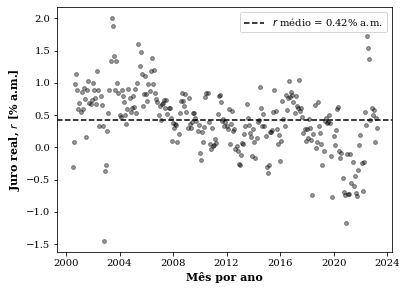

In [8]:
# plot 2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.5))

# plot juro_real_ntnb
ax.scatter(cdi_ntnb["MES"], juro_real_ntnb, s=15, alpha=0.4, linewidths=1, color='black')
ax.axhline(y = juro_real_medio, color = 'k', linestyle = '--', label= r"$r$ médio = 0.42% a.m.")

# juro_real_ntnb eixos
ax.set_ylabel(r'Juro real, $r$ [% a.m.]', fontweight='bold', fontdict=font)
ax.set_xlabel('Mês por ano', fontweight='bold', fontdict=font)

# legenda
plt.legend(prop={'family': 'serif'})

# salvar gráfico
plt.savefig('juro_real_hist.png', bbox_inches='tight')

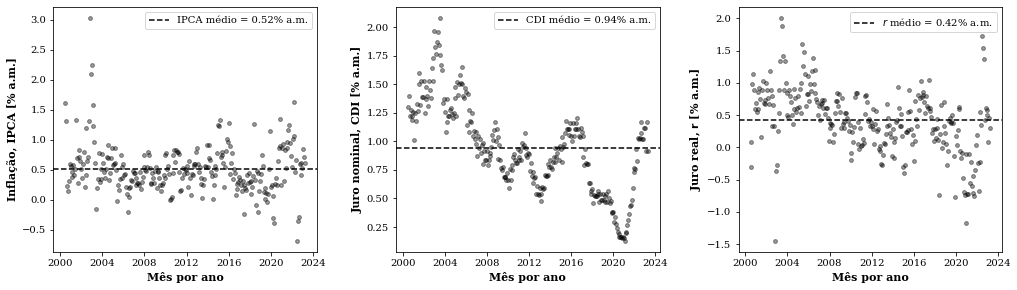

In [15]:
# plot 3
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 4.5))

# set the spacing between subplots
plt.subplots_adjust(wspace=0.3)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

# plot IPCA
ax[0].scatter(ipca_ntnb["MES"], ipca_ntnb["IPCA_MES"], s=15, alpha=0.4, linewidths=1, color='black')
ax[0].axhline(y = ipca_medio_mensal, color = 'k', linestyle = '--', label="IPCA médio = 0.52% a.m.")

ax[0].set_ylabel('Inflação, IPCA [% a.m.]', fontweight='bold', fontdict=font)
ax[0].set_xlabel('Mês por ano', fontweight='bold', fontdict=font)

# plot CDI
ax[1].scatter(cdi_ntnb["MES"], cdi_ntnb["CDI_MES"], s=15, alpha=0.4, linewidths=1, color='black')
ax[1].axhline(y = cdi_medio_mensal, color = 'k', linestyle = '--', label="CDI médio = 0.94% a.m.")

ax[1].set_ylabel('Juro nominal, CDI [% a.m.]', fontweight='bold', fontdict=font)
ax[1].set_xlabel('Mês por ano', fontweight='bold', fontdict=font)

# plot juro_real_ntnb
ax[2].scatter(cdi_ntnb["MES"], juro_real_ntnb, s=15, alpha=0.4, linewidths=1, color='black')
ax[2].axhline(y = juro_real_medio, color = 'k', linestyle = '--', label= r"$r$ médio = 0.42% a.m.")

ax[2].set_ylabel(r'Juro real, $\mathbf{r}$ [% a.m.]', fontweight='bold', fontdict=font)
ax[2].set_xlabel('Mês por ano', fontweight='bold', fontdict=font)


# legenda
ax[0].legend(prop={'family': 'serif'})
ax[1].legend(prop={'family': 'serif'})
ax[2].legend(prop={'family': 'serif'})

# salvar gráfico
plt.savefig('ipca_cdi_juro-real.png', bbox_inches='tight')